In [90]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import scipy
import matplotlib
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_confusion_matrix,confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
print('Python : {}'.format(sys.version))
print('Scipy : {}'.format(scipy.__version__))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Sklearn : {}'.format(sklearn.__version__))

Python : 3.10.1 (tags/v3.10.1:2cd268a, Dec  6 2021, 19:10:37) [MSC v.1929 64 bit (AMD64)]
Scipy : 1.7.3
Numpy : 1.21.5
Pandas : 1.3.5
Matplotlib : 3.5.1
Sklearn : 1.0.2


In [4]:
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv').head(376)
data.head()

,Word,Count,Noun,Verb,Letter,adjective,morphological,The,diacritic,Outcome
0,8e117a32510d41082681de68937befd3f564c349067ec5...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,b401e637ead22b50ca3012befa3c55901d2248781750ed...,5.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
2,c2132540fedae6dba455d57553753448f7685171ac60dd...,5.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,f0993ec4ddf41ffe8b87ecd35fa09be5a7d56ab0424875...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
4,3fa07d2ebd61fb0384890778f359a7c873fc429d18a71b...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


In [5]:
data.sort_values(by='Count').head()

,Word,Count,Noun,Verb,Letter,adjective,morphological,The,diacritic,Outcome
313,661a568b46bcb7b24fe4232e3a201b14c1903b8c394db9...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
314,9216dd4a2f0b1115ae30f8f99069e5f9f37ffcbfcab0a7...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
312,3d278a63ff49d322a91e51f3191a027458743828c1f620...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
59,519e7e53fa9f4d008d93b620b86fdf0badd3824b2b1733...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
374,ca275a27a116ff0e38aa5826c53e6c69bf57a3ee839b26...,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## ####################################################################################################################################################################

## EDA (Exploratory Data Analysis)

In [6]:
print(data.shape)

(376, 10)


In [7]:
print(data.groupby('Outcome').size())

Outcome
0.0    207
1.0    169
dtype: int64


In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Word           376 non-null    object 
 1   Count          376 non-null    float64
 2   Noun           376 non-null    float64
 3   Verb           376 non-null    float64
 4   Letter         376 non-null    float64
 5   adjective      376 non-null    float64
 6   morphological  376 non-null    float64
 7   The            376 non-null    float64
 8   diacritic      376 non-null    float64
 9   Outcome        376 non-null    float64
dtypes: float64(9), object(1)
memory usage: 29.5+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,376.0,4.659574,1.180311,2.0,4.0,5.0,5.0,8.0
Noun,376.0,2.765957,2.924565,0.0,0.0,1.0,6.0,9.0
Verb,376.0,0.867021,1.230015,0.0,0.0,0.0,1.0,3.0
Letter,376.0,0.039894,0.195970,0.0,0.0,0.0,0.0,1.0
adjective,376.0,0.031915,0.176008,0.0,0.0,0.0,0.0,1.0
morphological,376.0,4.273936,2.915149,1.0,2.0,2.0,7.0,11.0
The,376.0,0.095745,0.294633,0.0,0.0,0.0,0.0,1.0
diacritic,376.0,1.726064,0.756808,1.0,1.0,2.0,2.0,4.0
Outcome,376.0,0.449468,0.498103,0.0,0.0,0.0,1.0,1.0


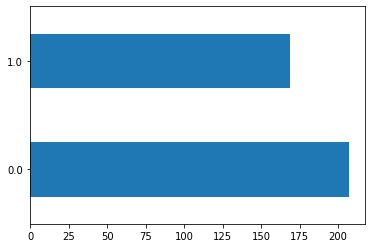

In [10]:
# Bar בתור  Outcome בוא נראה 0, 1 מספרים של
data['Outcome'].value_counts().plot.barh();

In [11]:
#(תכונה שאיננו צריכים ,נרצה לשחרר אותה)
data.drop("Word", inplace = True, axis=1) 
y = data['Outcome'].values
x = data.drop(["Outcome"], axis = 1)

In [12]:
data.isnull().sum()  #(see how many null values we have then we don't need to normalize)

Count            0
Noun             0
Verb             0
Letter           0
adjective        0
morphological    0
The              0
diacritic        0
Outcome          0
dtype: int64

## #########################################################################################################################################################################

## Logistic Regression

In [156]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 232)

In [356]:
# lr_model = LogisticRegression(solver = "liblinear")    #(רגרסיה לוגיסטית)
# lr = lr_model.fit(x,y)                             #(הגדר את הדגם)
# lr_model

In [355]:
# lr_model.intercept_      # (ערכים קבועים)
# lr_model.coef_           # (ערכים עצמאיים)

## Predict & Model Tuning

In [354]:
# y_pred = lr_model.predict(x)       #(predict)
# confusion_matrix(y, y_pred)        #(confussion matrix)

In [353]:
# accuracy_score(y, y_pred)

In [352]:
# print(classification_report(y, y_pred))

In [351]:
# lr_model.predict(x)[0:50]   # Model predict

In [350]:
# lr_model.predict_proba(x)[0:10][:,0:2]

### Now lets try model 'predict_proba' probability

In [349]:
# y_probs = lr_model.predict_proba(x)
# y_probs = y_probs[:,1]
# print(y_probs[21:60])

In [165]:
# y_pred = [1 if i > 0.5 else 0 for i in y_probs]   # giving limit for values

In [348]:
# print(y_pred[21:60]) # and compare with above you can see what happened

In [347]:
# confusion_matrix(y, y_pred)

In [346]:
# accuracy_score(y, y_pred)

In [345]:
# print(classification_report(y, y_pred))

In [344]:
# logit_roc_auc = roc_auc_score(y, lr_model.predict(x))
# fpr, tpr, thresholds = roc_curve(y, lr_model.predict_proba(x)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc, color="red")
# plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate',size=15,color="g")
# plt.ylabel('True Positive Rate',size=15,color="g")
# plt.title('Receiver operating characteristic',size=15,color="r")
# plt.legend(loc="lower right")
# plt.show()

# red line: which we set our model
# blue line: if we dont do it what can we take result
# Area under the ROC curve is one of the most useful metrics to evaluate a supervised classification model

In [171]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 208)

In [343]:
# lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)
# lr = LogisticRegression(solver = "liblinear")
# lr_model = lr.fit(x_train,y_train)
# lr_model

In [342]:
# accuracy_score(y_test, lr_model.predict(x_test))

In [174]:
# cross_val_score(lr_model, x_test, y_test, cv = 10).mean()

0.8166666666666667

## ##################################################################################################################################################################

## Gaussian Naive Bayes

In [428]:
x_train, x_validation, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 252)
nb =  MultinomialNB()
# nb = GaussianNB(priors=None, var_smoothing=1e-09)
nb_model = nb.fit(x_train, y_train)
y_pred = nb_model.predict(x_validation)  # predict
nb_model

MultinomialNB()

In [429]:
accuracy_score(y_test, y_pred)


0.68

In [341]:
# cross_val_score(lr_model, x_test, y_test, cv = 10).mean()

In [279]:
print(classification_report(y_test, y_pred)) # get detail print

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        64
         1.0       0.67      0.67      0.67        61

    accuracy                           0.68       125
   macro avg       0.68      0.68      0.68       125
weighted avg       0.68      0.68      0.68       125



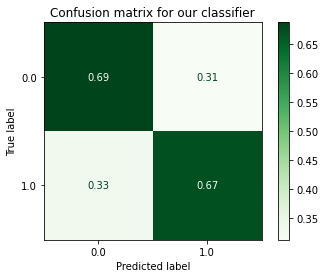

In [324]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import scipy
import matplotlib
import sklearn
from mlxtend.plotting import plot_decision_regions
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv').head(376)
data.drop("Word", inplace = True, axis=1) 
y = data['Outcome'].values
x = data.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 252)
nb =  MultinomialNB()
nb_model.fit(x_train, y_train)
matrix = plot_confusion_matrix(nb_model, x_test, y_test,cmap=plt.cm.Greens,normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [340]:
# nb_model.predict(x_validation)[0:45]

In [339]:
# nb_model.predict_proba(x_validation)[0:25]

## ##########################################################################################################################################################################

## KNN

In [272]:
x_train, x_validation, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 252)
# Predict & Model
# knn = KNeighborsClassifier(n_neighbors=8)
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
knn_model = knn.fit(x_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=8)

In [276]:
y_pred = knn.predict(x_validation)
accuracy_score(y_test, y_pred)

0.888

In [274]:
print(classification_report(y_test, y_pred)) # get detail print

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        64
         1.0       0.90      0.87      0.88        61

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125



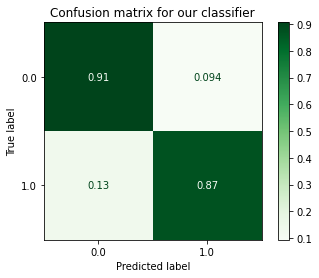

In [322]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import scipy
import matplotlib
import sklearn
from mlxtend.plotting import plot_decision_regions
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv').head(376)
data.drop("Word", inplace = True, axis=1) 
y = data['Outcome'].values
x = data.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 252)
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)
matrix = plot_confusion_matrix(knn_model, x_test, y_test,cmap=plt.cm.Greens,normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

## Model Tunning

In [71]:
# knn_params = {"n_neighbors": np.arange(1,50)}   # find KNN parameters

In [338]:
# fit model classification & CV
# knn = KNeighborsClassifier(n_neighbors=8)
# knn_cv = GridSearchCV(knn, knn_params, cv=10)
# knn_cv.fit(x_train, y_train)

In [337]:
# print("Best score:" + str(knn_cv.best_score_))
# print("Best parameters: " + str(knn_cv.best_params_))

In [74]:
# knn = KNeighborsClassifier(3)
# knn_tuned = knn.fit(x_train, y_train)

In [336]:
# knn.score(x_test, y_test)

In [335]:
# y_pred = knn.predict(x_test)
# accuracy_score(y_test, y_pred)

## ####################################################################################################################################################################

## Random Forest 

In [334]:
# rf_model = RandomForestClassifier().fit(X_train, y_train)
# rf_model

In [333]:
# y_pred = rf_model.predict(X_test)
# accuracy_score(y_test, y_pred)

## Model Tuning

In [449]:
# rf_params = {"max_depth": [2,5,8,10],
#             "max_features": [2,5,8],
#             "n_estimators": [10,500,1000],
#             "min_samples_split": [2,5,10]}

In [450]:
# rf_model = RandomForestClassifier()

# rf_cv_model = GridSearchCV(rf_model, 
#                            rf_params, 
#                            cv = 10, 
#                            n_jobs = -1, 
#                            verbose = 2) 

In [332]:
# rf_cv_model.fit(X_train, y_train)

In [331]:
# print("Best Parameters: " + str(rf_cv_model.best_params_))

In [330]:
# # using given parameters then create final model
# rf_tuned = RandomForestClassifier(max_depth = 2, 
#                                   max_features = 5, 
#                                   min_samples_split = 10,
#                                   n_estimators = 10)

# rf_tuned.fit(X_train, y_train)

In [329]:
# # tunned test model predict accuracy score
# y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred)

## Support vector machine (SVM)

In [420]:
x_train, x_validation, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 252)

In [421]:
vsm_model = SVC(gamma='auto')
vsm_model.fit(x_train, y_train)
y_pred = vsm_model.predict(x_validation)
# vsm_model.score(x_validation, y_test)
vsm_model

SVC(gamma='auto')

In [422]:
accuracy_score(y_test, y_pred)

0.92

In [267]:
print(classification_report(y_test, y_pred)) # get detail print

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        64
         1.0       0.93      0.90      0.92        61

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



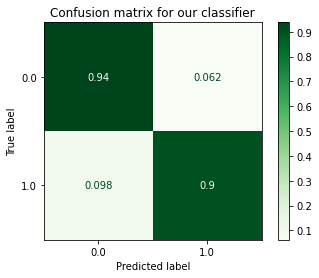

In [463]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import scipy
import matplotlib
import sklearn
from mlxtend.plotting import plot_decision_regions
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv').head(376)
data.drop("Word", inplace = True, axis=1) 
y = data['Outcome'].values
x = data.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 252)
vsm_model = svm.SVC(gamma="auto")
vsm_model.fit(x_train, y_train)
matrix = plot_confusion_matrix(vsm_model, x_test, y_test,cmap=plt.cm.Greens,normalize='true')
plt.title('Confusion matrix for our classifier')
print(matrix)
# plt.show()

In [326]:
# len(x),(y)

## ####################################################################################################################################################################

In [565]:
# data.drop("Word", inplace = True, axis=1)

# y = data.Outcome.values
# x = data.drop(["Outcome"], axis = 1)

In [328]:
# y_pred = lr_model.predict(x)       
# confusion_matrix(y, y_pred)

In [327]:
# y_probs = lr_model.predict_proba(x)
# y_probs = y_probs[:,1]
# y_probs[0:20]

In [454]:
import pandas as pd   
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

scoring= 'accuracy'
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv').head(376)
data.drop("Word", inplace = True, axis=1) 
y = data['Outcome'].values
x = data.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = None, random_state = None)
models= []
# models.append(('LR', LogisticRegression()))
# models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %.2f (%.3f)' % (name, cv_results.mean(), cv_results.std())
    print('\n' + msg)


KNN: 0.89 (0.042)

NB: 0.68 (0.076)

SVM: 0.94 (0.021)


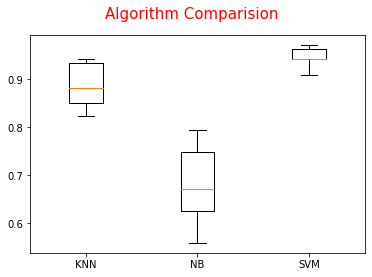

In [455]:
#comparing algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparision',color = "r", size = 15)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()